In [1]:
#external packages
import numpy as np
import math
from astropy import units as u
import astropy.coordinates as coord
from astropy.table import Table
from astropy.io import fits
import time
from numpy.lib.recfunctions import append_fields
from astropy.cosmology import FlatLambdaCDM,Planck15
from matplotlib.backends.backend_pdf import PdfPages
import sys
import random
%load_ext autoreload

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

sys.path.append('/home/almhatre/data')

In [2]:
import AGNclustering.kNN_functions as k
from AGNclustering.KNN_stuff import CDFkNN_rp_pi
from AGNclustering.kNN_error import kNN_ratio_error, block_test, kNN_chi_squared,kNN_diff_error,chop_cdf
from AGNclustering.utils import z_to_cdist
from AGNclustering.wppi_utils import control_mult_var,control_var

In [3]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
data_directory = '/home/almhatre/data/BASS/'
cat = Table.read(data_directory + 'data_dr2.csv',format='csv')
agnt =np.array(cat)
agn = agnt[ (agnt['L210']>42.5) & (agnt['z']>.01)&(agnt['z']<=.1) ]
t = Table.read(data_directory +'2mrs_noAGN.csv',format='csv')
gal =np.array(t)
gal=gal[(gal['z']>.01)&(gal['z']<=.1)] #Limit redshifts to same range as AGN
agn.dtype.names

('col0',
 'bat_index',
 'Counterpart',
 'Type',
 'z',
 'Mbh',
 'Method',
 'Edd_rat',
 'L_edd',
 'L_bol',
 'NH',
 'L210',
 'ra',
 'dec',
 'L14195',
 'AGN',
 'flux',
 'Snu_1',
 'Snu_6',
 'Morphology',
 'log_Ms',
 'Lir_sf')

In [4]:
nonzero=(agn["Mbh"]>0)
agnmass=agn[nonzero]
zbins=np.arange(0.01,.11,.01)

stmin=np.min(agnmass['log_Ms'][agnmass['log_Ms']>8])
stmax=np.max(agnmass['log_Ms'][agnmass['log_Ms']>8])
increm=(stmax-stmin)/5
msbins=np.arange(stmin,stmax+increm,increm)

increm=(stmax-stmin)/9
msbinsmod=np.arange(stmin,stmax+increm,increm)


stmin=np.min(agnmass['Mbh'][agnmass['Mbh']>0])
stmax=np.max(agnmass['Mbh'][agnmass['Mbh']>0])
increm=(stmax-stmin)/9
massbins=np.arange(stmin,stmax+increm,increm)


percentile=33

In [5]:
%autoreload 2

lower, mid, upper = control_mult_var(agn=agnmass,bins1=zbins,bins2=massbins,control1='z',control2='Mbh',var='L210',percentile=50)

l, m, up = control_var(agn=agnmass,bins=zbins,control='z',var='Mbh',percentile=percentile)


In [36]:
kneighbors=8

# rs=np.logspace(-1,np.log10(41),11)
# rs=np.insert(rs,-1,40.0)
# pis=np.logspace(-1,np.log10(41),11)
# pis=np.insert(pis,-1,40.0)
# rsmod= np.logspace(-1,np.log10(40),11)
# pismod = np.logspace(-1,np.log10(40),11)


# rs=np.logspace(0,np.log10(41),5)
# rs=np.insert(rs,-1,40.0)
# pis=np.logspace(0,np.log10(41),5)
# pis=np.insert(pis,-1,40.0)
# rsmod= np.logspace(0,np.log10(40),5)
# pismod = np.logspace(0,np.log10(40),5)


# rs= np.arange(0,42,1,dtype=float)
# rs[0]=0.1
# pis = np.arange(0,42,1,dtype=float)
# pis[0]=0.1
# rsmod= np.arange(0,42,1,dtype=float)
# rsmod[0]=0.1
# pismod = np.arange(0,42,1,dtype=float)
# pismod[0]=0.1
# rsmod=np.delete(rsmod,-1)
# pismod=np.delete(pismod,-1)

# rs = np.array([4,11,25,26],dtype=float)
# rsmod = np.array([4,11,25],dtype=float)
# pis = np.array([4,11,25,26],dtype=float)
# pismod = np.array([4,11,25],dtype=float)

rs= np.arange(0,62,1,dtype=float)
rs[0]=0.1
pis = np.arange(0,62,1,dtype=float)
pis[0]=0.1
rsmod= np.arange(0,62,1,dtype=float)
rsmod[0]=0.1
pismod = np.arange(0,62,1,dtype=float)
pismod[0]=0.1
rsmod=np.delete(rsmod,-1)
pismod=np.delete(pismod,-1)

rlimits = np.array([[ 1., 30.],
 [ 2., 39.],
 [ 2., 45.],
 [ 2., 48.],
 [ 3., 51.],
 [ 3., 54.],
 [ 3., 57.],
 [ 3. ,58.]])

rlimits10cutoff = np.array([[ 2., 23.],
 [ 3. , 30.],
 [ 4. , 35.],
 [ 4. , 37.],
 [ 4. , 40.],
 [ 4. , 42.],
 [ 5. , 44.],
 [ 5. , 45.]])

# rlimits = np.array([[ 2., 25.],
#  [ 3., 35.],
#  [ 3., 40.],
#  [ 3., 44.],
#  [ 4., 45.],
#  [ 4., 50.],
#  [ 4., 52.],
#  [ 4. ,53.]])


print(rs)
print(rsmod)
# output150,err50,cov = k.kNN_wrapper(rs,pis, agn, gal,kneighbors=5,m=50,rpbool=True)
# output,err,cov = k.kNN_wrapper(rs,pis,agn,gal,kneighbors=3,m=5,rpbool=True)

[ 0.1  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
 14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
 28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
 42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
 56.  57.  58.  59.  60.  61. ]
[ 0.1  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
 14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
 28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
 42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
 56.  57.  58.  59.  60. ]
[[ 1. 30.]
 [ 2. 39.]
 [ 2. 45.]
 [ 2. 48.]
 [ 3. 51.]
 [ 3. 54.]
 [ 3. 57.]
 [ 3. 58.]]


In [37]:
# Find midpoints in logspace and add them to a list of rs to sample for each neighbors
rlimits = rlimits10cutoff
logmidpoints = np.array([])
for i in range(8):
    midway = math.exp((math.log(rlimits[i][0])+math.log(rlimits[i][1]))/2)
    logmidpoints = np.append(logmidpoints, round(midway,0))
    
rslistvalues = np.array([(0,0,0)])
for i in range(8):
    rslistvalues = np.append(rslistvalues, [(rlimits[i][0],logmidpoints[i],rlimits[i][1])],axis=0)
    
rslistvalues = rslistvalues[1:]
print(rslistvalues)

[[ 2.  7. 23.]
 [ 3.  9. 30.]
 [ 4. 12. 35.]
 [ 4. 12. 37.]
 [ 4. 13. 40.]
 [ 4. 13. 42.]
 [ 5. 15. 44.]
 [ 5. 15. 45.]]


In [38]:
rslist = np.empty((8,len(rs)),dtype=bool)
for i in range(8):
    index = 0
    for j in range(len(rs)):
        if(j == len(rs)-1):
            rslist[i,j] = True
        elif(index == 3):
            rslist[i,j] = False
        elif(rslistvalues[i][index]==rs[j]):
            rslist[i,j] = True
            index = index + 1
        else:
            rslist[i,j] = False

In [39]:
t1=time.time()
outputlow,errlow,covlow = k.kNN_wrapper(rs,pis, l, gal,rslist,kneighbors=8,rlistbool=True,m=6,concatenate=True,rpbool=True)
t = time.time() - t1
print('took ',str(t/60),' minutes')

using LCDM cosmology: Om0=.3, H0=70
Ngal 213 Nrand 38567 8
build tree 0.0003447532653808594
query 0.00923609733581543
  kdtree tot 0.009629964828491211
cdf parallel 0.0256192684173584
  cdf 0.026142120361328125
Using  36  jacknife samples
1 / 36
using LCDM cosmology: Om0=.3, H0=70
Ngal 211 Nrand 38246 8
build tree 0.00023484230041503906
query 0.008837461471557617
  kdtree tot 0.009123563766479492
cdf parallel 0.026290416717529297
  cdf 0.026888608932495117
2 / 36
using LCDM cosmology: Om0=.3, H0=70
Ngal 205 Nrand 37441 8
build tree 0.00023293495178222656
query 0.008792400360107422
  kdtree tot 0.009073257446289062
cdf parallel 0.024960041046142578
  cdf 0.025518417358398438
3 / 36
using LCDM cosmology: Om0=.3, H0=70
Ngal 205 Nrand 36636 8
build tree 0.00025177001953125
query 0.008621931076049805
  kdtree tot 0.008922815322875977
cdf parallel 0.024253368377685547
  cdf 0.024804115295410156
4 / 36
using LCDM cosmology: Om0=.3, H0=70
Ngal 201 Nrand 36481 8
build tree 0.0003185272216796875

In [40]:
outputhigh, errhigh, covhigh = k.kNN_wrapper(rs,pis, up, gal, rslist, kneighbors=8, rlistbool=True, m=6, concatenate=True,rpbool=True)

using LCDM cosmology: Om0=.3, H0=70
Ngal 212 Nrand 38567 8
build tree 0.0002505779266357422
query 0.009496212005615234
  kdtree tot 0.009795665740966797
cdf parallel 0.02532362937927246
  cdf 0.025923967361450195
Using  36  jacknife samples
1 / 36
using LCDM cosmology: Om0=.3, H0=70
Ngal 211 Nrand 38246 8
build tree 0.00023818016052246094
query 0.009014368057250977
  kdtree tot 0.009309053421020508
cdf parallel 0.025139808654785156
  cdf 0.02570033073425293
2 / 36
using LCDM cosmology: Om0=.3, H0=70
Ngal 201 Nrand 37441 8
build tree 0.00028443336486816406
query 0.008722543716430664
  kdtree tot 0.009055137634277344
cdf parallel 0.024558067321777344
  cdf 0.02509927749633789
3 / 36
using LCDM cosmology: Om0=.3, H0=70
Ngal 198 Nrand 36636 8
build tree 0.0002474784851074219
query 0.008502721786499023
  kdtree tot 0.00879669189453125
cdf parallel 0.024245500564575195
  cdf 0.0247805118560791
4 / 36
using LCDM cosmology: Om0=.3, H0=70
Ngal 203 Nrand 36481 8
build tree 0.0002665519714355469


In [41]:
# newcovlow = np.zeros((len(covlow),len(covlow),len(rs)-1,len(rs)-1))
# for i in range(len(covlow)):
#     for j in range(len(covlow)):
#         temp = np.delete(covlow[i][j], -1, axis=0)
#         temp = np.delete(temp, -1, axis=1)
#         newcovlow[i][j] = temp
        
        
# newcovhigh = np.zeros((len(covhigh),len(covhigh),len(rs)-1,len(rs)-1))
# for i in range(len(covhigh)):
#     for j in range(len(covhigh)):
#         temp = np.delete(covhigh[i][j], -1, axis=0)
#         temp = np.delete(temp, -1, axis=1)
#         newcovhigh[i][j] = temp


# a = np.delete(covhigh, -1, axis=1)
# a = np.delete(a, -1, axis=2)

# b = np.delete(covlow, -1, axis=1)
# b = np.delete(b, -1, axis=2)

c = np.delete(outputhigh, -1, axis=1)
c = np.delete(c, -1, axis=2)

d = np.delete(outputlow, -1, axis=1)
d = np.delete(d, -1, axis=2)

In [42]:
n1lowmod=np.array([d[i][-1] for i in np.arange(len(d))])
n1highmod=np.array([c[i][-1] for i in np.arange(len(c))])

In [43]:
rsbool = np.delete(rslist,-1,axis=1)
n1highmodnew = np.empty((kneighbors,3))
index = 0
for i in range(kneighbors):
    for j in range(3):
        n1highmodnew[i,j] = n1highmod[rsbool][index]
        index+=1
        
n1lowmodnew = np.empty((kneighbors,3))       
index = 0
for i in range(kneighbors):
    for j in range(3):
        n1lowmodnew[i,j] = n1lowmod[rsbool][index]
        index+=1
        

In [44]:
inv = np.linalg.inv(covhigh)
orig = np.linalg.inv(inv)
print(orig-covhigh)

[[ 1.21972744e-19  8.13151629e-20  6.09863722e-19  3.18484388e-19
   7.31836466e-19  7.72494048e-19  1.02999206e-18  1.97866896e-18
   1.46367293e-18  7.31836466e-19  1.21972744e-18  1.92445886e-18
   4.67562187e-19  1.59919820e-18  2.06676039e-18 -1.50771865e-19
   2.23616698e-19  1.88380127e-18 -3.25260652e-19 -2.98155597e-19
   1.24005623e-18  7.44541961e-19  1.49077799e-18  1.54498810e-18]
 [ 5.42101086e-20  5.42101086e-20  1.35525272e-18  3.25260652e-19
   9.21571847e-19  1.91090633e-18  1.51788304e-18  3.14418630e-18
   3.41523684e-18  1.24683250e-18  2.05998413e-18  4.25549353e-18
   1.11130723e-18  3.15773883e-18  4.44522891e-18 -5.28548559e-19
  -1.15196481e-19  4.51299154e-18 -7.04731412e-19 -1.16551734e-18
   3.08997619e-18  1.59919820e-18  2.89939378e-18  3.63885354e-18]
 [ 2.71050543e-19  9.75781955e-19  8.94466792e-19  2.50721752e-19
   1.08420217e-18  6.77626358e-19  8.36868552e-19  1.33492392e-18
   9.89334482e-19  7.79270311e-19  1.22650371e-18  9.89334482e-19
   4.811

In [45]:
np.linalg.cond(covlow)

1453.9813317062954

In [46]:
np.linalg.cond(covhigh)

2767.158001354919

In [49]:
np.linalg.cond(combined_cov)

502.7560806216213

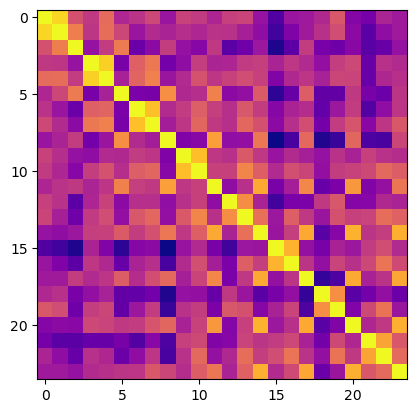

In [48]:
combined_cov = covhigh+covlow
corr_matrix = np.zeros((len(covhigh),len(covhigh)))
for i in range(len(covhigh)):
    for j in range(len(covhigh)):
        corr_matrix[i,j] = (combined_cov[i,j])/(math.sqrt(combined_cov[i,i]*combined_cov[j,j]))
        
plt.imshow(corr_matrix, cmap = 'plasma')


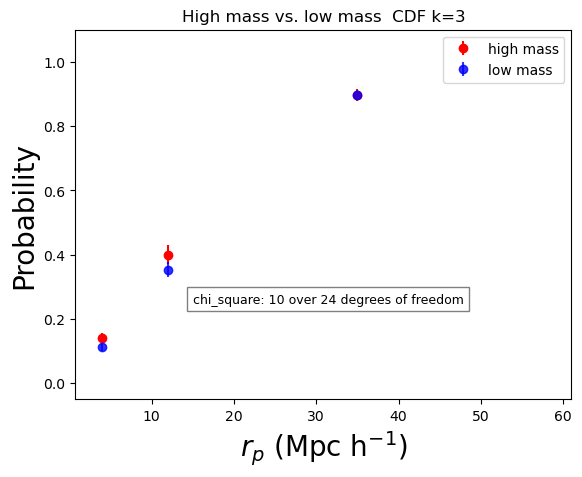

In [50]:
# Concatenated kNN stuff --  NEW APPROACH
kneighbors = 8
neighbor = 3
ind = neighbor - 1

chi_value = kNN_chi_squared(n1highmodnew,n1lowmodnew,covhigh,covlow,concatenate=True)

chi_str = 'chi_square: '+ str(int(chi_value)) + ' over '+ str(3*kneighbors)+' degrees of freedom'

# differrnew = kNN_diff_error(n1highmod[ind],n1lowmod[ind],errhigh[ind][0:-1],errlow[ind][0:-1],single_neighbor=True)

nonzero=np.array([n1lowmod != 0])[0]
nonzero=nonzero[ind]

rsbool = np.delete(rslist,-1,axis=1)


# fig1 = plt.figure(1)
# frame1=fig1.add_axes((.1,.3,.8,.6),xscale='log',yticks=[.0,.2,.4,.6,.8,1.0])
plt.errorbar(rsmod[rsbool[ind]],n1highmodnew[ind],yerr=errhigh[ind][0:-1],fmt='o',label='high mass',color='red')
plt.errorbar(rsmod[rsbool[ind]],n1lowmodnew[ind],yerr=errlow[ind][0:-1],fmt='o',label='low mass',color='blue',alpha=0.8)
plt.ylabel('Probability',fontsize=20)
# plt.legend(frameon=False,numpoints=1,loc=2)
plt.title('High mass vs. low mass  CDF k=' + str(neighbor))
plt.text(15, 0.25, chi_str, fontsize=9,bbox = dict(facecolor = 'white', alpha = 0.5))
plt.axis([0.75,61,-.05,1.1])

# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('$r_{p}$ (Mpc h$^{-1}$)',fontsize=20)
# plt.figtext(0.5, -.08, chi_str, ha="center", fontsize=12)
plt.legend()

#Residual plot
# frame2=fig1.add_axes((.1,.1,.8,.2),xscale='log',yticks=[-1,0,1])
# plt.scatter(rsmod[nonzero],(n1highmod[ind][nonzero]-n1lowmod[ind][nonzero])/differr[ind][0:-1][nonzero],label='high-low',alpha=0.8)
# plt.fill_between([-1,80],[1,1],[-1,-1],color='gray',alpha=0.3)
# plt.ylabel('(high-low)/error',fontsize=8)
# plt.xlabel('$r_{p}$ (Mpc h$^{-1}$)',fontsize=12)
# plt.axis([0.75,65,-2,2])



[[ 1. 30.]
 [ 2. 39.]
 [ 2. 45.]
 [ 2. 48.]
 [ 3. 51.]
 [ 3. 54.]
 [ 3. 57.]
 [ 3. 58.]]


(0.75, 65.0, -2.0, 2.0)

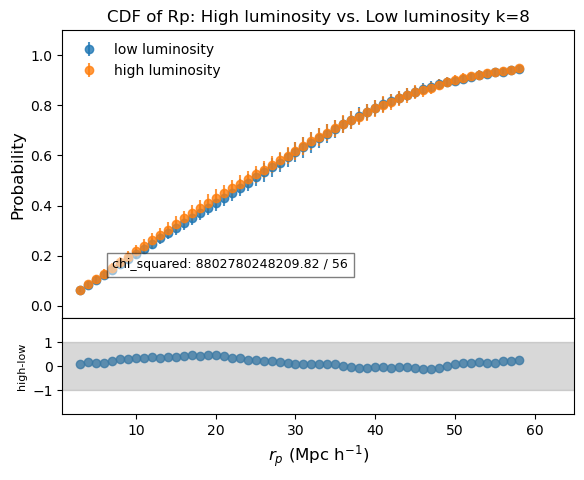

In [77]:
# Concatenated kNN stuff
kneighbors = 8
neighbor = 3
ind = neighbor - 1

chi_value = kNN_chi_squared(n1highmod,n1lowmod,covhigh,covlow,concatenate=True)

chi_str = 'chi_square: '+ str(int(chi_value)) + ' over '+ str(len(rsmod)*kneighbors)+' degrees of freedom'

# differrnew = kNN_diff_error(n1highmod[ind],n1lowmod[ind],errhigh[ind][0:-1],errlow[ind][0:-1],single_neighbor=True)

nonzero=np.array([n1lowmod != 0])[0]
nonzero=nonzero[ind]


# fig1 = plt.figure(1)
# frame1=fig1.add_axes((.1,.3,.8,.6),xscale='log',yticks=[.0,.2,.4,.6,.8,1.0])
plt.errorbar(rsmod,n1highmod[ind],yerr=errhigh[ind][0:-1],fmt='o',label='high mass',color='red')
plt.errorbar(rsmod,n1lowmod[ind],yerr=errlow[ind][0:-1],fmt='o',label='low mass',color='blue',alpha=0.8)
plt.ylabel('Probability',fontsize=20)
# plt.legend(frameon=False,numpoints=1,loc=2)
plt.title('High mass vs. low mass  CDF k=' + str(neighbor))
plt.text(15, 0.25, chi_str, fontsize=9,bbox = dict(facecolor = 'white', alpha = 0.5))
plt.axis([0.75,41,-.05,1.1])

# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('$r_{p}$ (Mpc h$^{-1}$)',fontsize=20)
# plt.figtext(0.5, -.08, chi_str, ha="center", fontsize=12)
plt.legend()

#Residual plot
# frame2=fig1.add_axes((.1,.1,.8,.2),xscale='log',yticks=[-1,0,1])
# plt.scatter(rsmod[nonzero],(n1highmod[ind][nonzero]-n1lowmod[ind][nonzero])/differr[ind][0:-1][nonzero],label='high-low',alpha=0.8)
# plt.fill_between([-1,80],[1,1],[-1,-1],color='gray',alpha=0.3)
# plt.ylabel('(high-low)/error',fontsize=8)
# plt.xlabel('$r_{p}$ (Mpc h$^{-1}$)',fontsize=12)
# plt.axis([0.75,65,-2,2])



In [24]:
rlimitsnew = np.array([(0,0)])
rlimitsnew=rlimitsnew[1:]

[[ 2. 23.]
 [ 3. 30.]
 [ 4. 35.]
 [ 4. 37.]
 [ 4. 40.]
 [ 4. 42.]
 [ 5. 44.]
 [ 5. 45.]]


(0.75, 65.0, -2.0, 2.0)

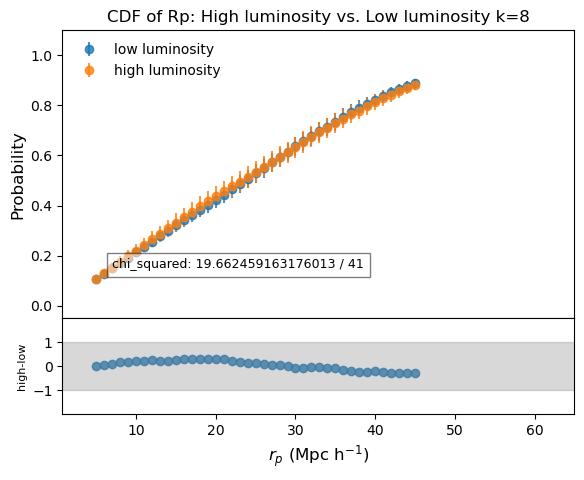

In [32]:
neighbor = 8

ind = neighbor - 1


rsnew,pisnew,highnew,lownew,errhighnew, errlownew, cov_highnew,cov_lownew = \
chop_cdf(rsmod,pismod,n1highmod,n1lowmod,errhigh[ind][0:-1],errlow[ind][0:-1],a,b,ind)


chi_squarednew = kNN_chi_squared(highnew,lownew,cov_highnew,cov_lownew,single_neighbor=True)

differrnew = kNN_diff_error(highnew,lownew,errhighnew,errlownew,single_neighbor=True)

chi_strnew = 'chi_squared: '+ str(chi_squarednew) + ' / '+ str(len(rsnew))

addit = [(rsnew[0],rsnew[-1])]


rlimitsnew = np.append(rlimitsnew,addit,axis=0)
print(rlimitsnew)

fig1 = plt.figure(1)
frame1=fig1.add_axes((.1,.3,.8,.6),yticks=[.0,.2,.4,.6,.8,1.0])
plt.errorbar(rsnew,lownew,yerr=errlownew,fmt='o',label='low luminosity',alpha=0.8)
plt.errorbar(rsnew,highnew,yerr=errhighnew,fmt='o',label='high luminosity',alpha=0.8)
plt.ylabel('Probability',fontsize=12)
plt.legend(frameon=False,numpoints=1,loc=2)
plt.title('CDF of Rp: High luminosity vs. Low luminosity k=' + str(neighbor))
# plt.text(30, 0.25, chi_strnew, fontsize=9,bbox = dict(facecolor = 'white', alpha = 0.5))
plt.text(7, 0.15, chi_strnew, fontsize=9,bbox = dict(facecolor = 'white', alpha = 0.5))
plt.axis([0.75,65,-.05,1.1])

#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.2),yticks=[-1,0,1])
plt.scatter(rsnew,(highnew-lownew)/differrnew,label='high-low',alpha=0.8)
plt.fill_between([-1,80],[1,1],[-1,-1],color='gray',alpha=0.3)
plt.ylabel('high-low',fontsize=8)
plt.xlabel('$r_{p}$ (Mpc h$^{-1}$)',fontsize=12)
plt.axis([0.75,65,-2,2])
